# Movie Gross & Sentiment 
## Steps 3 & 4
### Group 9 Final Project - DNSC 6211

Team Members:
* Kelly Berdelle
* Jason Houghton
* Yuebo Li
* Qinya Wang
* Gaoshuang Zhu

## Step 3: Plot the data

Using the csv file from our python code, we can now use R and ggplot2 to analyze the data on univariate and multivariate levels. 

In [1]:
library(ggplot2)

In [2]:
movieData <- read.csv('BoxOfficeSentiment.csv', header = TRUE)

head(movieData)

,Index,Ranking,Movie.Title,Studio,Adjusted.Gross,Unadjusted.Gross,Year,Sentiment.Score
1,0,1,Gone with the Wind,MGM,1739604200,198676459,1939,50.75568182
2,1,2,Star Wars,Fox,1533609700,460998007,1977,52.91690341
3,2,3,The Sound of Music,Fox,1226196400,158671368,1965,64.5004798
4,3,4,E.T.: The Extra-Terrestrial,Uni.,1221365800,435110554,1982,55.04686147
5,4,5,Titanic,Par.,1166435200,658672302,1997,51.78573232
6,5,6,The Ten Commandments,Par.,1127910000,65500000,1956,50.49433923


We use summary statistics to get a sense of our data.

In [4]:
summary(movieData)

     Index           Ranking                           Movie.Title 
 Min.   :  0.00   Min.   :  1.00   101 Dalmatians            :  1  
 1st Qu.: 49.75   1st Qu.: 50.75   2001: A Space Odyssey     :  1  
 Median : 99.50   Median :100.50   9 to 5                    :  1  
 Mean   : 99.50   Mean   :100.50   Airport                   :  1  
 3rd Qu.:149.25   3rd Qu.:150.25   Aladdin                   :  1  
 Max.   :199.00   Max.   :200.00   Alice in Wonderland (2010):  1  
                                   (Other)                   :194  
     Studio   Adjusted.Gross      Unadjusted.Gross         Year     
 BV     :32   Min.   :3.248e+08   Min.   :  9183673   Min.   :1921  
 WB     :28   1st Qu.:3.659e+08   1st Qu.:111613851   1st Qu.:1973  
 Fox    :25   Median :4.356e+08   Median :215975399   Median :1991  
 Par.   :25   Mean   :5.011e+08   Mean   :229441830   Mean   :1987  
 Uni.   :23   3rd Qu.:5.455e+08   3rd Qu.:318620624   3rd Qu.:2004  
 Dis.   :11   Max.   :1.740e+09   Max.   :

### Sentiment Score vs. Adjusted Gross

Next, we try to see if there are any linear relationships found in our data using the lm() function. Our hypothesis is that Adjusted Gross and Sentiment Score have a positive linear relationship.

In [5]:
grossbyScore <- lm(Sentiment.Score~Adjusted.Gross, data = movieData)
summary(grossbyScore)


Call:
lm(formula = Sentiment.Score ~ Adjusted.Gross, data = movieData)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.278  -2.763  -1.058   1.727  30.073 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.383e+01  1.214e+00  44.326   <2e-16 ***
Adjusted.Gross 4.865e-10  2.231e-09   0.218    0.828    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.699 on 198 degrees of freedom
Multiple R-squared:  0.00024,	Adjusted R-squared:  -0.004809 
F-statistic: 0.04753 on 1 and 198 DF,  p-value: 0.8276


### Sentiment Score vs. Adjusted Gross and Year

In [6]:
scorebyGrossYear <- lm(Sentiment.Score~Adjusted.Gross + Year, data = movieData)
summary(scorebyGrossYear)


Call:
lm(formula = Sentiment.Score ~ Adjusted.Gross + Year, data = movieData)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.851  -2.895  -0.498   1.939  28.058 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.694e+02  4.716e+01   3.592 0.000415 ***
Adjusted.Gross -1.398e-09  2.334e-09  -0.599 0.549922    
Year           -5.766e-02  2.353e-02  -2.451 0.015119 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.615 on 197 degrees of freedom
Multiple R-squared:  0.02982,	Adjusted R-squared:  0.01998 
F-statistic: 3.028 on 2 and 197 DF,  p-value: 0.05067


### Adjusted Gross vs. Year and Unadjusted Gross

In [7]:
adjbyYearUn <- lm(Adjusted.Gross~Year + Unadjusted.Gross, data = movieData)
summary(adjbyYearUn)


Call:
lm(formula = Adjusted.Gross ~ Year + Unadjusted.Gross, data = movieData)

Residuals:
       Min         1Q     Median         3Q        Max 
-545318772  -42920689   -6008509   25034606  713445702 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.366e+10  1.436e+09   16.47   <2e-16 ***
Year             -1.184e+07  7.321e+05  -16.17   <2e-16 ***
Unadjusted.Gross  1.575e+00  1.049e-01   15.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 137900000 on 197 degrees of freedom
Multiple R-squared:  0.5843,	Adjusted R-squared:  0.5801 
F-statistic: 138.5 on 2 and 197 DF,  p-value: < 2.2e-16


### Sentiment Score vs. Adjusted Gross, Unadjusted Gross, Year, and Studio

Next, we tried using all of our variables to see if together they could create a meaningful relationship.


Call:
lm(formula = Sentiment.Score ~ Adjusted.Gross + Unadjusted.Gross + 
    Year + Studio, data = movieData)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.4879  -2.8191  -0.2179   2.0125  28.7393 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)       1.952e+02  1.439e+02   1.357   0.1767  
Adjusted.Gross    4.041e-10  4.005e-09   0.101   0.9198  
Unadjusted.Gross -3.591e-09  8.563e-09  -0.419   0.6755  
Year             -7.280e-02  7.234e-02  -1.006   0.3157  
StudioBV          4.987e+00  6.835e+00   0.730   0.4666  
StudioCol.        4.699e+00  6.988e+00   0.672   0.5022  
StudioDis.        2.346e+00  6.984e+00   0.336   0.7374  
StudioDW          2.945e+00  7.696e+00   0.383   0.7024  
StudioFox         6.477e+00  6.741e+00   0.961   0.3380  
StudioIFC         3.709e+00  9.389e+00   0.395   0.6933  
StudioLGF         1.322e+01  7.784e+00   1.698   0.0913 .
StudioMGM        -3.281e+00  7.022e+00  -0.467   0.6409  
StudioMPC      

Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198

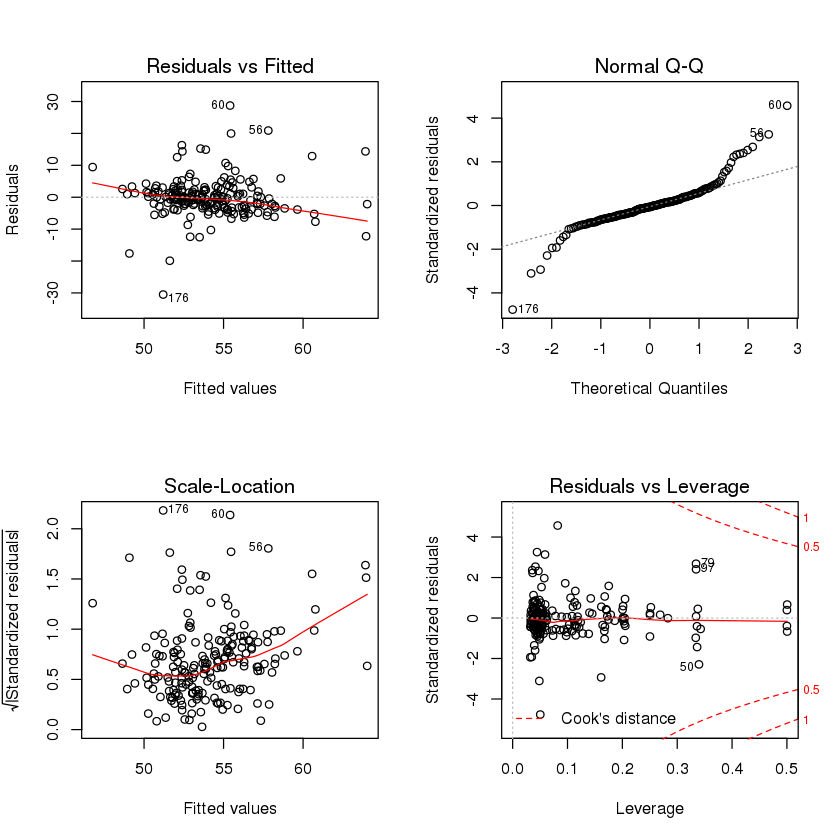

In [8]:
model1 <- lm(Sentiment.Score ~ Adjusted.Gross + Unadjusted.Gross + Year + Studio, data = movieData)
summary(model1)
par(mfrow=c(2,2))
plot(model1)


### Stepwise Regression

We can use forward and backward Stepwise Regression by AIC to see if any model works.

In [9]:
library(MASS)
step <- stepAIC(model1, direction="both")
step$anova

Start:  AIC=777.77
Sentiment.Score ~ Adjusted.Gross + Unadjusted.Gross + Year + 
    Studio

                   Df Sum of Sq    RSS    AIC
- Studio           23   1161.96 8620.9 760.73
- Adjusted.Gross    1      0.44 7459.4 775.78
- Unadjusted.Gross  1      7.58 7466.5 775.97
- Year              1     43.66 7502.6 776.94
<none>                          7458.9 777.77

Step:  AIC=760.73
Sentiment.Score ~ Adjusted.Gross + Unadjusted.Gross + Year

                   Df Sum of Sq    RSS    AIC
- Unadjusted.Gross  1      0.73 8621.6 758.74
- Adjusted.Gross    1     11.09 8632.0 758.98
- Year              1     62.23 8683.1 760.16
<none>                          8620.9 760.73
+ Studio           23   1161.96 7458.9 777.77

Step:  AIC=758.74
Sentiment.Score ~ Adjusted.Gross + Year

                   Df Sum of Sq    RSS    AIC
- Adjusted.Gross    1     15.70 8637.3 757.11
<none>                          8621.6 758.74
+ Unadjusted.Gross  1      0.73 8620.9 760.73
- Year              1    262.91 

,Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
1,,NA,NA,173,7458.93437595176,777.770094279953
2,- Studio,23,1161.95924378641,196,8620.89361973816,760.725331983922
3,- Unadjusted.Gross,1,0.73192321094939,197,8621.62554294911,758.742311479887
4,- Adjusted.Gross,1,15.6980027455302,198,8637.32354569464,757.106134491216


### Sentiment Score vs. Studio


Call:
lm(formula = Sentiment.Score ~ Studio, data = movieData)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.712  -2.441  -0.569   1.885  31.723 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    51.9687     6.6553   7.809 4.99e-13 ***
StudioBV        1.2637     6.7585   0.187    0.852    
StudioCol.      4.3957     7.0153   0.627    0.532    
StudioDis.      3.3110     6.9512   0.476    0.634    
StudioDW       -0.3681     7.6849  -0.048    0.962    
StudioFox       4.7739     6.7871   0.703    0.483    
StudioIFC       0.5174     9.4120   0.055    0.956    
StudioLGF       8.7116     7.6849   1.134    0.259    
StudioMGM      -2.9842     7.1148  -0.419    0.675    
StudioMPC       0.3492     9.4120   0.037    0.970    
StudioNL        1.2409     7.2905   0.170    0.865    
StudioNM        2.4999     9.4120   0.266    0.791    
StudioOrion     2.4385     9.4120   0.259    0.796    
StudioP/DW     -0.6004     7.4409  -0.081    0.936    
St

Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198

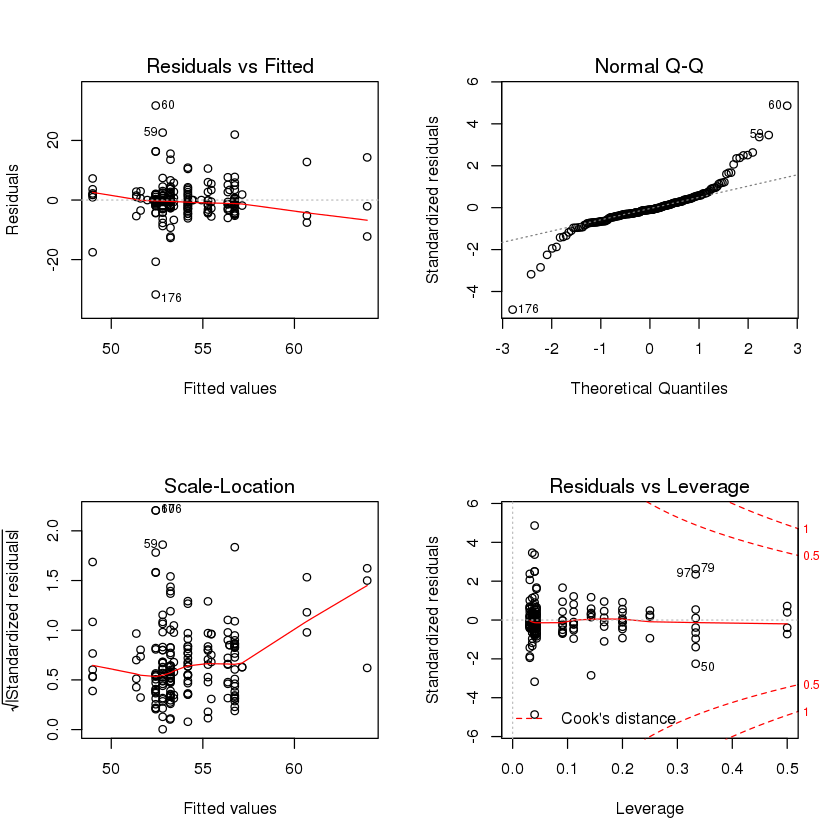

In [11]:
model2 <- lm(Sentiment.Score ~ Studio, data = movieData)
summary(model2)
par(mfrow=c(2,2))
plot(model2)

### Adjusted Gross vs Studio


Call:
lm(formula = Adjusted.Gross ~ Studio, data = movieData)

Residuals:
       Min         1Q     Median         3Q        Max 
-390662914 -101957838  -32343415   46080342  976199786 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    736815800  207247334   3.555 0.000485 ***
StudioBV      -295877055  210460662  -1.406 0.161530    
StudioCol.    -292787367  218457871  -1.340 0.181893    
StudioDis.    -111127336  216462780  -0.513 0.608330    
StudioDW      -265881400  239308608  -1.111 0.268067    
StudioFox     -144940912  211351640  -0.686 0.493754    
StudioIFC     -380194100  293091990  -1.297 0.196266    
StudioLGF     -327253000  239308608  -1.367 0.173214    
StudioMGM       26588614  221556719   0.120 0.904614    
StudioMPC     -341458700  293091990  -1.165 0.245587    
StudioNL      -298253940  227028079  -1.314 0.190646    
StudioNM      -222757100  293091990  -0.760 0.448257    
StudioOrion   -360564900  293091990  -1.230 0.220260    


Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198Warning message:
: not plotting observations with leverage one:
  22, 62, 98, 122, 139, 163, 198

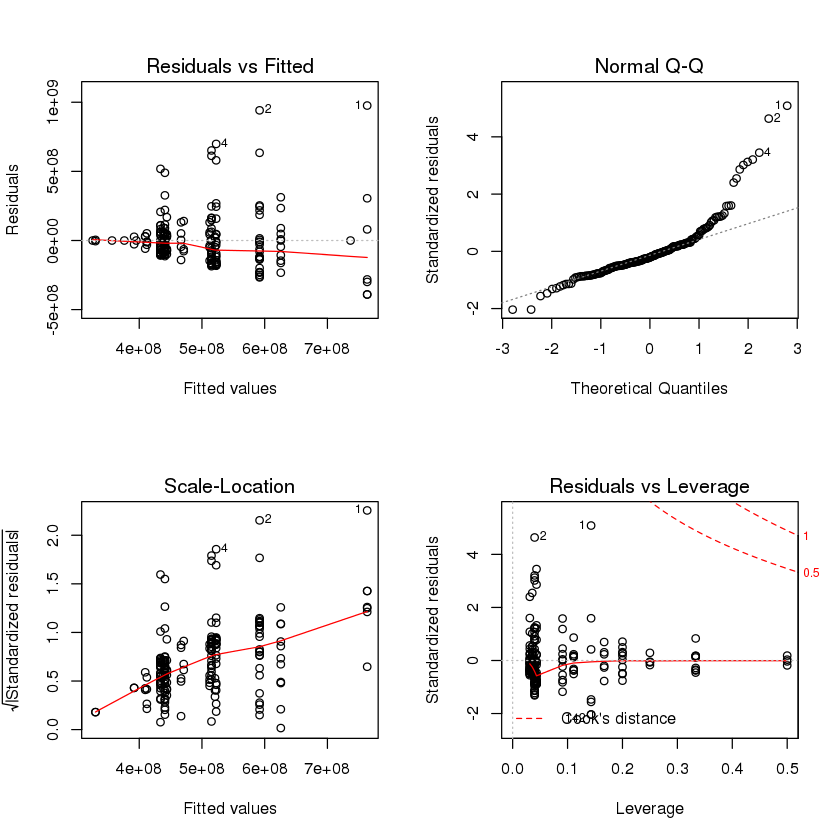

In [12]:
model7 <- lm(Adjusted.Gross ~ Studio, data = movieData)
summary(model7)
par(mfrow=c(2,2))
plot(model7)

We do not have sufficient evidence to say that there is a linear relationship between Adjusted Gross and Sentiment Score. Our only relationship of significance is Year and Unadjusted Gross versus Adjusted Gross. These should have a relationship since Box Office Mojo used Year and Unadjusted Gross to calculate Adjusted Gross, but it is also likely that additional inputs were used in their calculation.

Now, let's visualize the data graphically.

### Sentiment Score vs. Adjusted Gross Graph

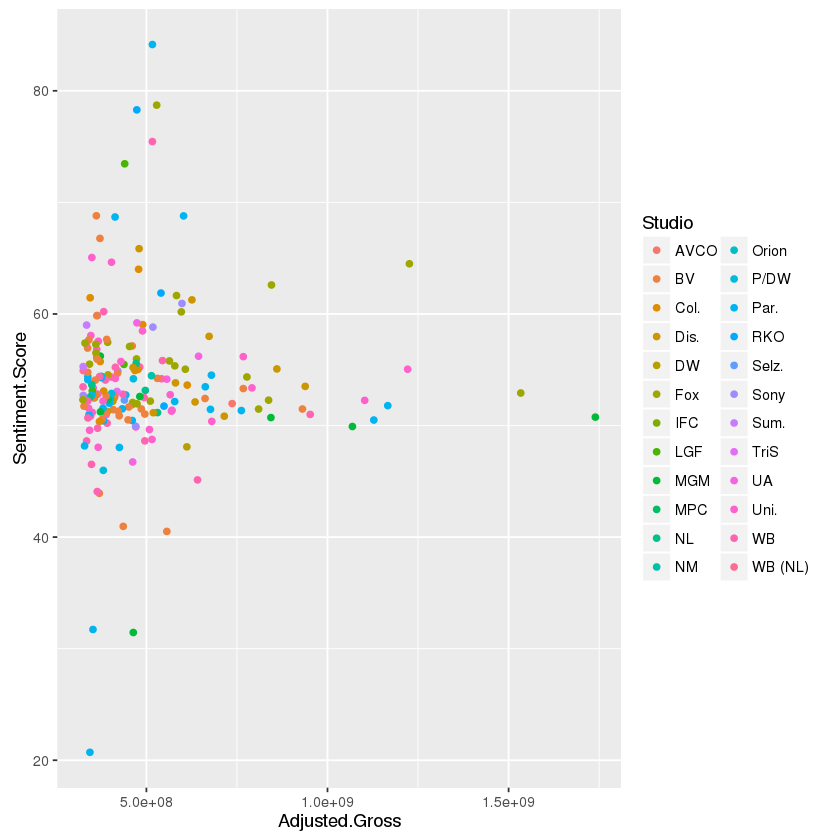

In [13]:
ggplot(data = movieData) + geom_point(mapping = aes(x = Adjusted.Gross, y = Sentiment.Score, color = Studio))

### Sentiment Score vs. Year Graph

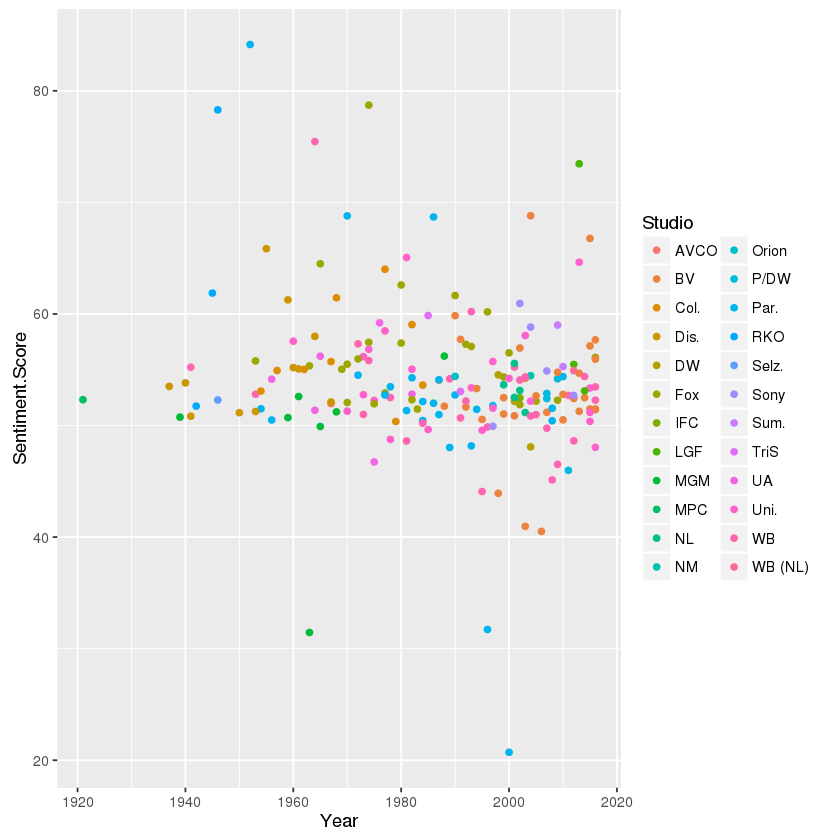

In [14]:
ggplot(data = movieData) + geom_point(mapping = aes(x = Year, y = Sentiment.Score, color = Studio))

### Unadjusted Gross vs. Year Graph

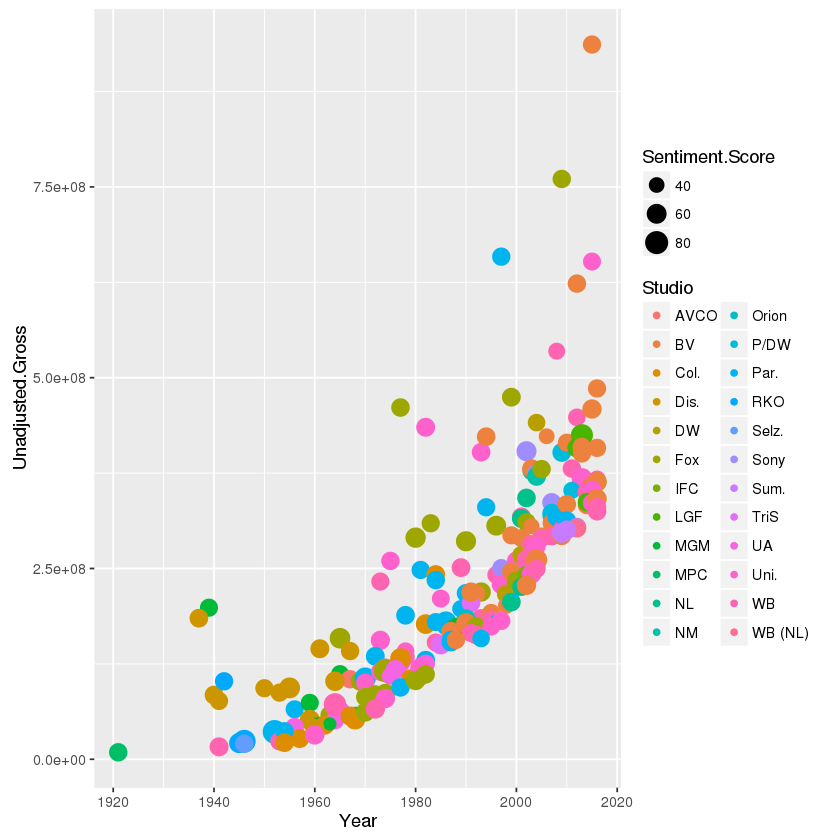

In [15]:
ggplot(data = movieData) + geom_point(mapping = aes(x = Year, y = Unadjusted.Gross, color = Studio, size = Sentiment.Score))

### Adjusted Gross vs. Year Graph

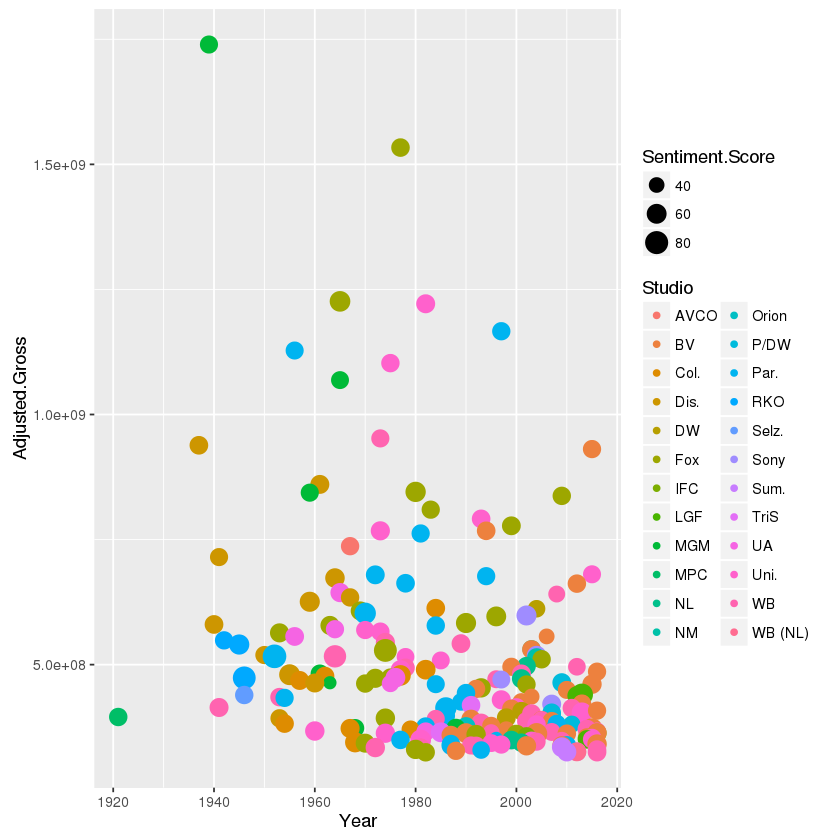

In [16]:
ggplot(data = movieData) + geom_point(mapping = aes(x = Year, y = Adjusted.Gross, color = Studio, size = Sentiment.Score))

### Unadjusted Gross vs. Year Graph

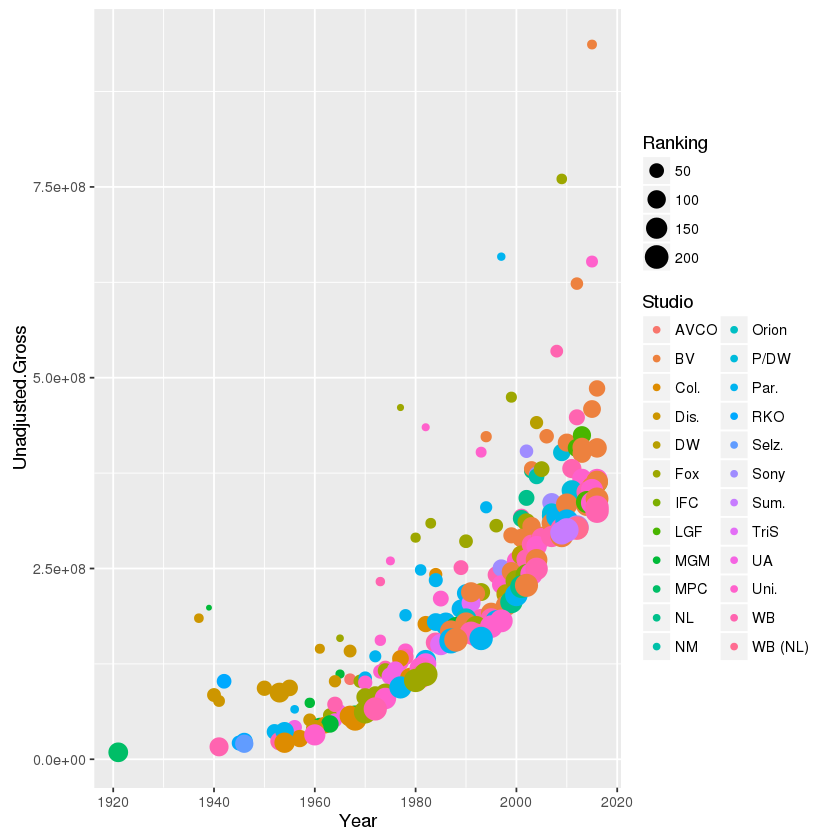

In [17]:
ggplot(data = movieData) + geom_point(mapping = aes(x = Year, y = Unadjusted.Gross, color = Studio, size = Ranking))

### Top 25 Highest-Grossing Movies
### Adjusted Gross vs. Year

We can also subset the data to see if any interesting relationships occur in relevant subsets.

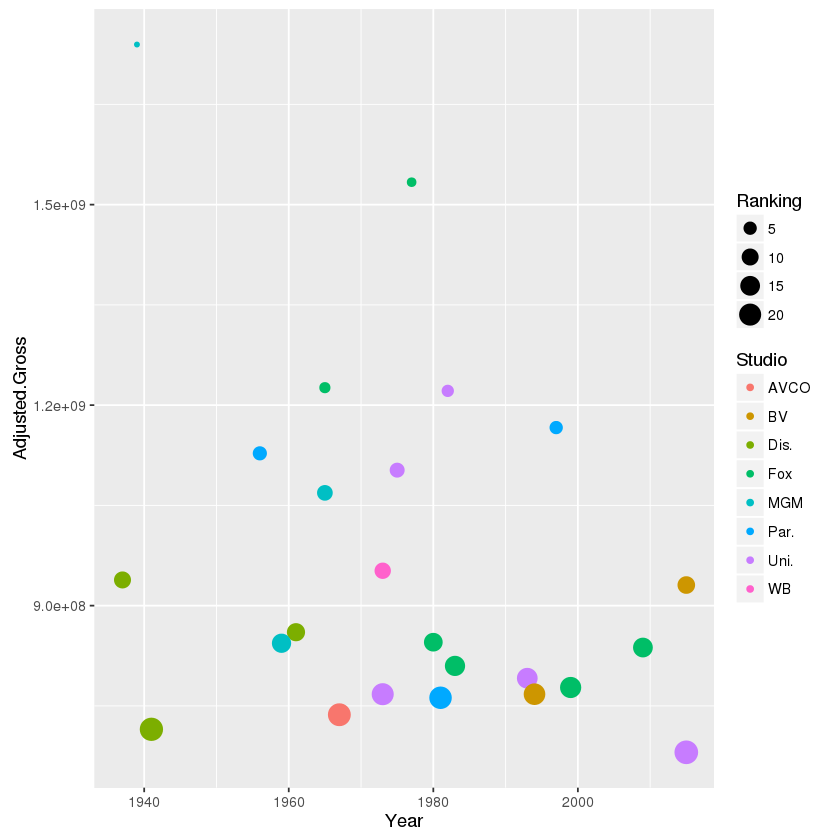

In [18]:
topMovies <- subset(movieData, Ranking < 25)

ggplot(data = topMovies) + geom_point(mapping = aes(x = Year, y = Adjusted.Gross, color = Studio, size = Ranking))

### Movies Since Twitter Started

### Sentiment Score vs. Adjusted Gross

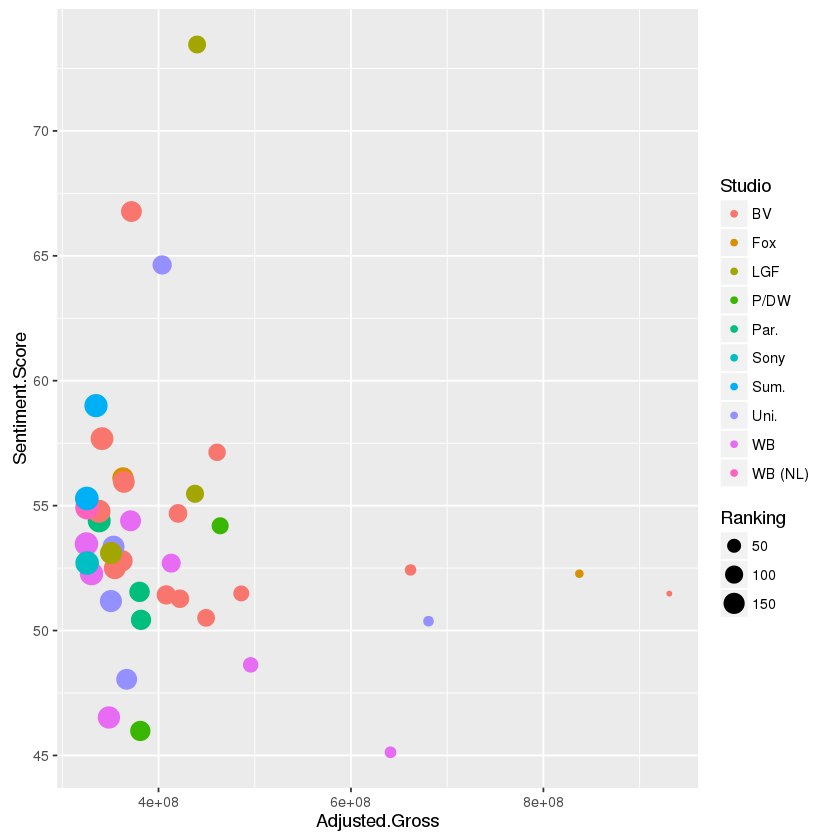

In [19]:
newMovies <- subset(movieData, Year > 2007)

ggplot(data = newMovies) + geom_point(mapping = aes(x = Adjusted.Gross, y = Sentiment.Score, color = Studio, size = Ranking))

### Sentiment Score vs. Year

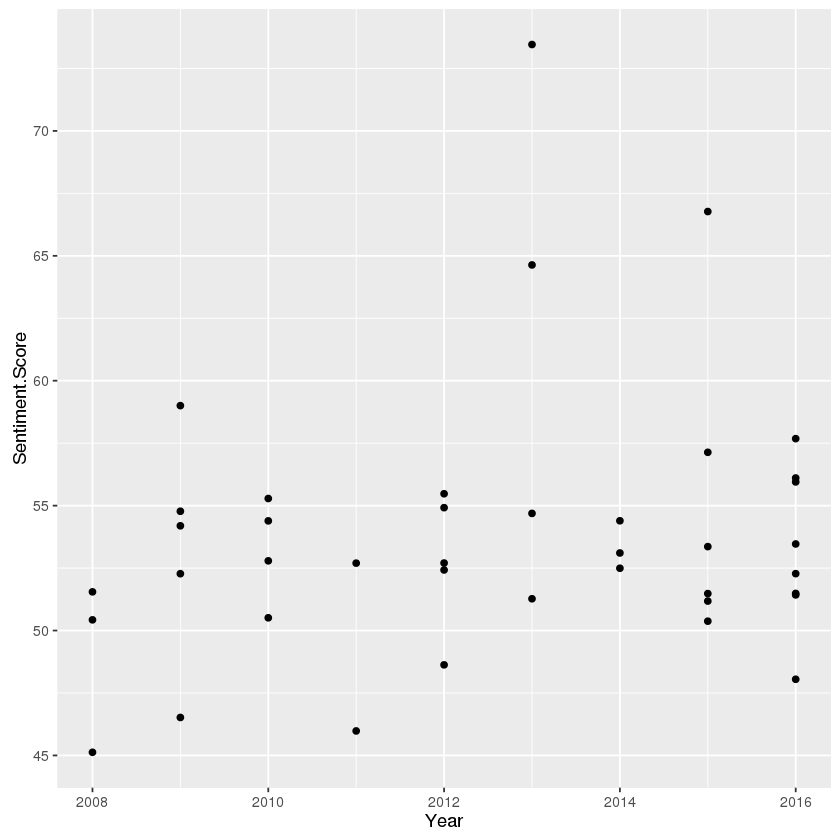

In [20]:
ggplot(data = newMovies) + geom_point(mapping = aes(x = Year, y = Sentiment.Score))

### Movies with Sentiment Scores in the Interquartile Range

### Sentiment Score vs. Adjusted Gross

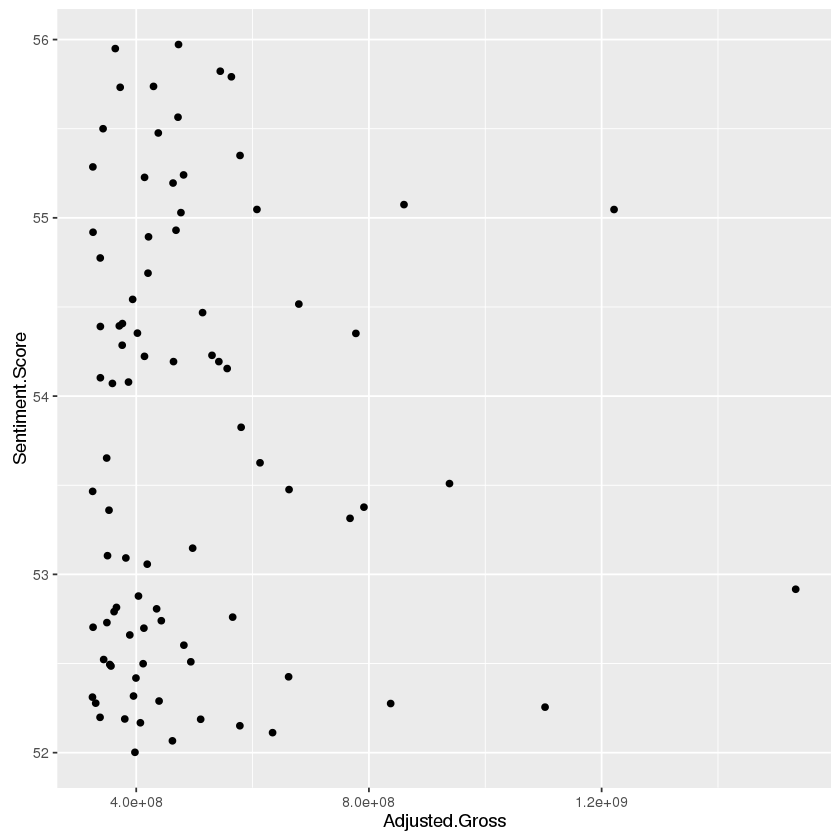

In [21]:
averSentMovies <- subset(movieData, Sentiment.Score < 56 & Sentiment.Score > 52)

ggplot(data = averSentMovies) + geom_point(mapping = aes(x = Adjusted.Gross, y = Sentiment.Score))

## Step 4: Create an interactive web application of the plots

Finally, we created an interactive web application with R Shiny so that any user can see these graphs.

The code for ui.R and server.R are shown below. They should be run in R Studio to view the interactive web application, but are listed here so that all R code related to this project can be found in a single location.

In [ ]:
#ui.R

library(shiny)

pageWithSidebar(
  headerPanel('Analysis of Top 200 Highest-Grossing Movies'),
  sidebarPanel(
    fileInput("file1", label = h3("File input")),
    
    checkboxInput("D", label = strong("X-Variable Distribution"), value = FALSE),
    selectInput('xcol', 'X Variable', names(df), selected=names(df)[[1]]),
    selectInput('ycol', 'Y Variable', names(df), selected=names(df)[[2]]),
    checkboxInput("L", label = strong("Linear model"), value = FALSE),
    
    
    sliderInput("Thickness",
                "Line Thickness:",
                min = 1,  max = 50, value = 10)
    
    ),
  mainPanel(
    plotOutput('plot1')
  )
)

In [ ]:
#server.R

library(shiny)

function(input, output, session) {
  
  # Combine the selected variables into a new data frame

  Data1 <- reactive({
    file1 <- input$file1
    if (is.null(file1)){return(NULL)}
      
    df <- read.csv(file1$datapath, header = TRUE)
    if (is.null(df)) {return(NULL)}
    updateSelectInput(session, 'xcol', 'X Variable', names(df))
    updateSelectInput(session, 'ycol', 'Y Variable', names(df))
    df
  })
 
   
  output$plot1 <- renderPlot({

    data2 <- Data1()[, c(input$xcol, input$ycol)]
    if (is.null(data2)) {return(NULL)}
    x <- data2[[1]]
    y <- data2[[2]]
    
    if(input$D){
      if(is.vector(x) == "TRUE"){
        hist(x, main = 'Distribution of X variable')
      }else{
        barplot(summary(x))
      }
      
      
    }else{
      plot(data2)
    }
    
    
    if(input$L){
      abline(lm(y~x), col = 'red', lwd = input$Thickness/10)
    }

  })
  
}